# Unsupervised Learning Final Project
## *Customer Segmentation & Personality Analysis*

Customer segmentation analysis is an important tool for businesses to align their strategy and improve their targets for current and future customers.
Performing customer segmentation is the first step in the process of creating marketing personas. Targetable user stories from personas allows businesses to tailor the strategy to drive sales. This can allow businesses to modify products and promotions according to the specific needs and behaviors of their customers. In addition, targetable personas allow businesses to appeal to the concerns of different types of customers.

In this project, I will use grocery store transaction data and will create a segmentation model using clustering methods that can be used for persona creation. The project will cover:
- Exploratory Data Analysis & Data Cleaning
- Feature Engineering & Data Preprocessing
- Clustering & Cluster Evaluation
- EDA With Respect to Persona Creation

## Exploratory Data Analysis

First, I will import all the necessary libraries.

In [109]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn import metrics

Next, I will import the data and take a look at the first few columns, as well as at the data types and dimensions of the data.

In [110]:

df = pd.read_csv('/Users/alyso/Downloads/marketing_campaign.csv',sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Observations About the Data

There are 29 columns and 2240 rows. The data types are as expected on first glance, no major issues stand out. 
The data can be split up into the following groups:
- Customer Information:
    - ID
    - Year_Birth
    - Education
    - Marital_Status
    - Income
    - KidHome
    - TeenHome
    - Dt_Customer
    - Recency
    - Complain
- Products:
    - MntWines
    - MntFruits
    - MntMeatProducts
    - MntFishProducts
    - MntSweetProducts
    - MntGoldProducts
- Location:
    - NumWebPurchases
    - NumCatalogPurchases
    - NumStorePurchases
    - NumWebVisitsPerMonth
- Promotions:
    - NumDealsPurchases
    - AcceptedCmp1
    - AcceptedCmp2
    - AcceptedCmp3 
    - AcceptedCmp4
    - AcceptedCmp5
    - Response

Some of these features can be combined. It might be more informative to sum all of the 'Mnt' columns into a 'Spent' column. A column for 'Age' might be more informative than the 'Year_Born' column is. We'll address this during feature engineering.

In [112]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 null values in the income column, and no other null values.

In [113]:
df.isnull().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

The missing income values represent 1% of the data. I'll fill the missing values with the mean value for the ['Income'] column.

In [114]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [115]:
# check for duplicated rows
df.duplicated().sum()

0

In [116]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

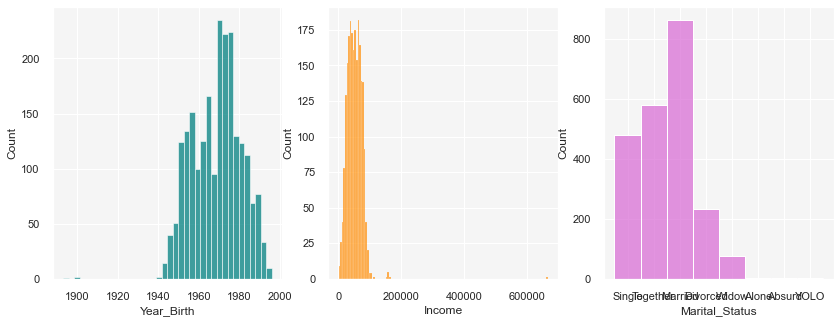

In [117]:

#take a look at a few of the columns to see the distribution and check for outlier
sns.set_theme(rc={"axes.facecolor":"whitesmoke","figure.facecolor":"white"})
plt.figure(figsize=(14, 5))
plt.subplot(1,3,1)
sns.histplot(df,x='Year_Birth',color = "teal")
plt.subplot(1,3,2)
sns.histplot(df,x='Income',color="darkorange")
plt.subplot(1,3,3)
sns.histplot(df,x='Marital_Status',color="orchid")

It looks like there are outlier for Year_Birth and Income, and Marital_Status has some unexpected values.

## Feature Engineering


In this next section of code I will perform the following steps to create some new features:
- Extract 'Age' from 'Year_Birth'
- Create 'Relationship' with valuues 'single' and 'not_single' from the various values in 'Marital_Status'
- Create 'Children' feature indicating total children living in the household
- Create 'Family_Size' indicating total members of the household
- Create 'Parent'  from the 'Kidhome' and 'Teenhome' features
- Create 'Spending' feature indicating total spendings on different categories
- Create 'Num_Purchases' from the different places of purchase
- Create 'AcceptCmp' from the 5 different promotionals 
- Change the 'Education' levels to be more intuitive 

In [118]:
# create a variable for age
df['Age'] = 2024-df['Year_Birth']

# create 'Single' and 'Not_Single' from Marital_Status
df['Relationship']=df['Marital_Status'].replace({'Married':'not_single' , 'Together':'not_single' , 'Single':'single' , 'Divorced':'single', 'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})

# create 'Children' indicating total children living in the household
df['Children']=df['Kidhome']+df['Teenhome']

# create 'Family_Size' for total members in the householde
df['Family_Size'] = df['Relationship'].replace({'single': 1, 'not_single':2})+ df['Children']

# create 'Parent' pertaining parenthood
df['Parent'] = np.where(df.Children> 0, 1, 0)

# create 'Spending' indicating total spent on different categories
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create 'Num_Purchases' indicating total purchases across locations
df['Num_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# create 'AcceptedCmp' totaling the number of accepted promotionals
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# change the names of the levels of education
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [119]:
# drop some of the unnecessary or redundant columns
df.drop(columns=['Marital_Status', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Recency', 'Complain', 'Dt_Customer'],inplace=True )

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

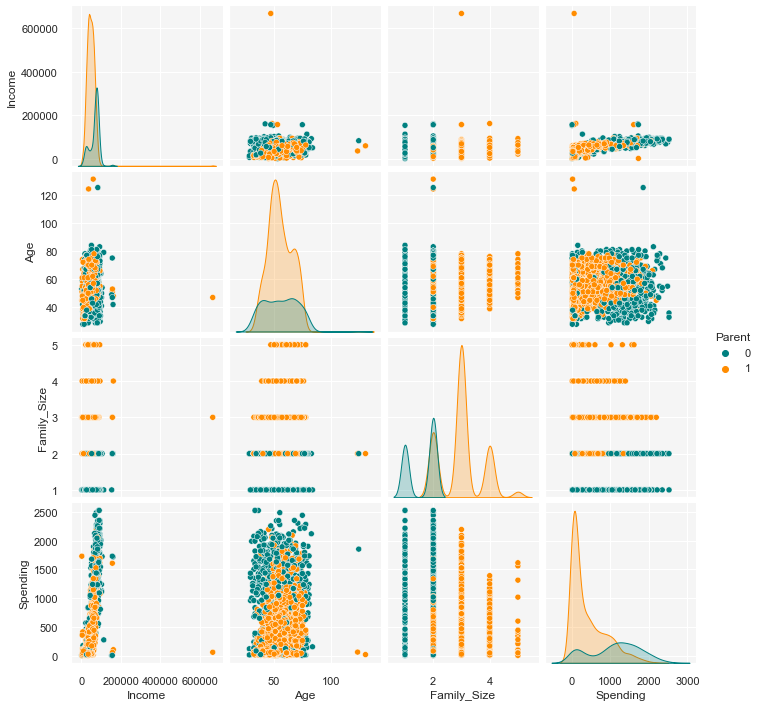

In [120]:
sns.set_theme(rc={"axes.facecolor":"whitesmoke","figure.facecolor":"white"})
To_Plot = ['Income', 'Age', 'Family_Size', 'Spending', 'Relationship', 'Parent']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Parent",palette= (['teal','darkorange']))

plt.show()

Clearly, there are some outliers in the Age and Income columns. We'll delete these by filtering out ages older than 100 and incomes over 250,000

In [121]:
# drop outliers by setting a cap on Age and Income
df = df[(df['Age'] < 100)]
df = df[(df['Income'] < 250000)]
print("Total number of data points after dropping outliers:", len(df))

Total number of data points after dropping outliers: 2236


<AxesSubplot:>

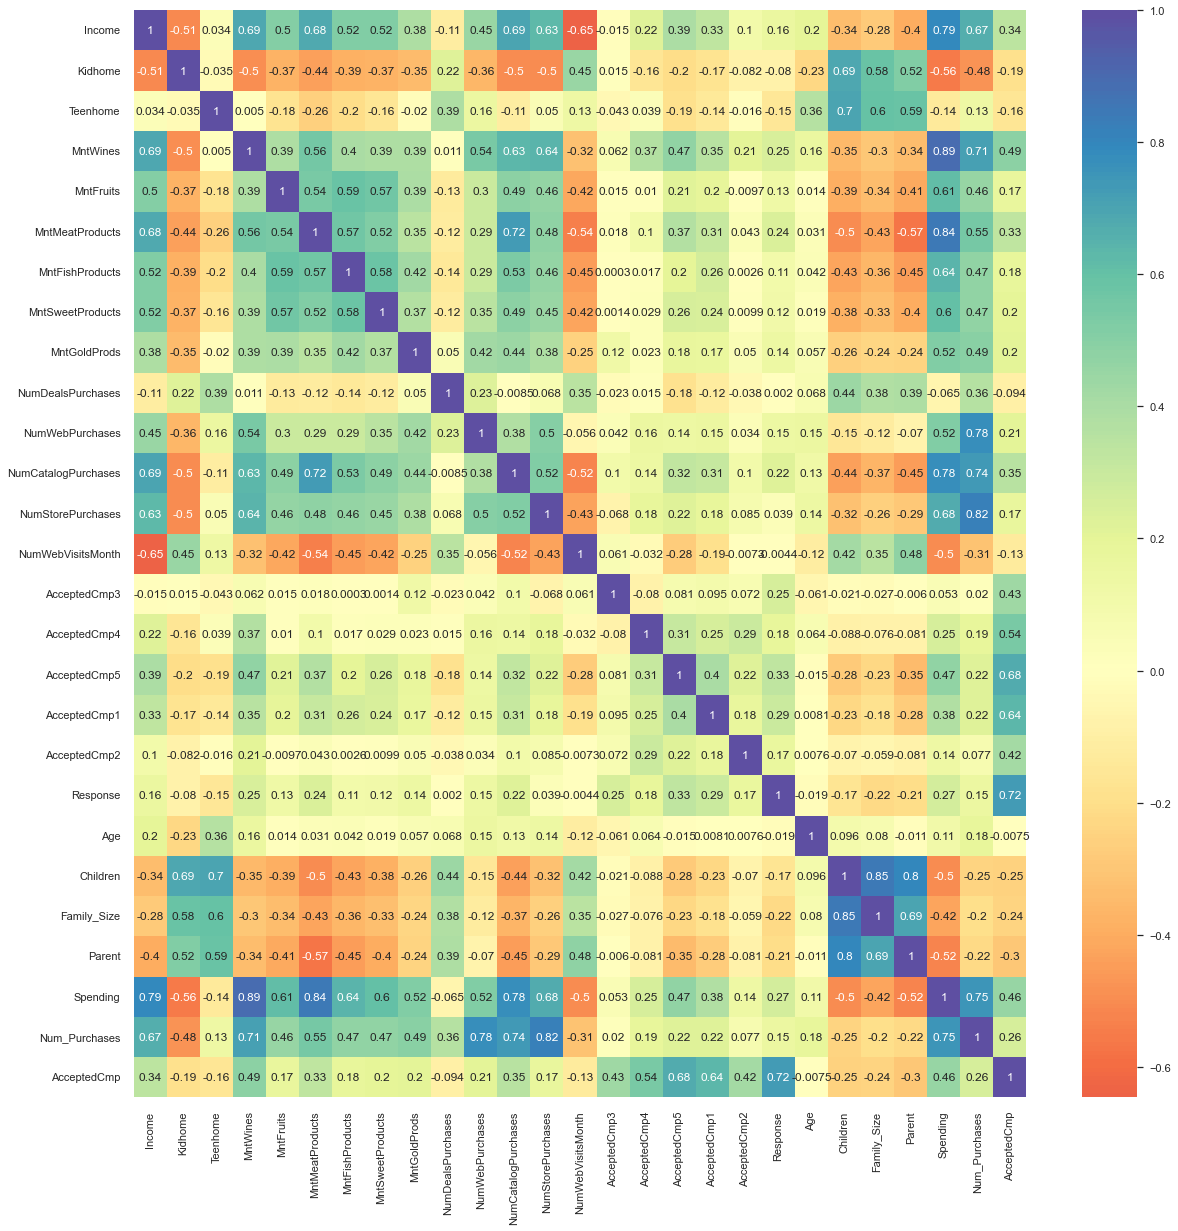

In [122]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='Spectral', center=0)

## Data Preprocessing

In this section I will perform the following:
- Label encoding the categorical features
- Scale the features using the standard scaler
- Create a subset of the data for dimensionality reduction


In [123]:
# identify the categorical features
cats = (df.dtypes == 'object')
cat_cols = list(cats[cats].index)
print("Categorical variables:", cat_cols)

Categorical variables: ['Education', 'Relationship']


In [124]:
LE = LabelEncoder()
for i in cat_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

All of the features are now numeric

In [125]:
pd.set_option('display.max_columns', None)

# copy of the data for dimensionality reduction
df_copy = df.copy()
df_copy.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Relationship,Children,Family_Size,Parent,Spending,Num_Purchases,AcceptedCmp
0,0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,67,1,0,1,0,1617,25,1
1,0,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,70,1,2,3,1,27,6,0
2,0,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,59,0,0,2,0,776,21,0
3,0,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,40,0,1,3,1,53,8,0
4,1,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,43,0,1,3,1,422,19,0


In [126]:
# delete all the columns related to the accepted deals and promotions
drop_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df_copy = df_copy.drop(labels = drop_cols, axis = 1)

In [127]:
df_copy.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Relationship,Children,Family_Size,Parent,Spending,Num_Purchases,AcceptedCmp
0,0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,67,1,0,1,0,1617,25,1
1,0,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,70,1,2,3,1,27,6,0
2,0,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,59,0,0,2,0,776,21,0
3,0,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,40,0,1,3,1,53,8,0
4,1,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,43,0,1,3,1,422,19,0


In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy.values)
df_scaled = pd.DataFrame(scaled_features, index=df_copy.index, columns = df_copy.columns)

## Principal Component Analysis

This data set is large and has many features. Some of these are highly correlated and redundant, containing the same information in different formats. The higher dimensionality a data set has, the more difficult it is to work with. In order to reduce the redundancy and make the data easier to work with, I will be performing PCA.

Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify the complexity of high-dimensional datasets while retaining most of the essential information. It achieves this by transforming the original variables into a new set of variables, called principal components, which are linear combinations of the original variables.

PCA reduces the dimensionality of the dataset by projecting it onto a lower-dimensional subspace. This subspace is defined by the principal components, which are orthogonal to each other and capture the maximum variance in the data.

PCA provides a powerful tool for reducing the dimensionality of complex datasets, facilitating data exploration, visualization, and analysis. However, it is essential to interpret the results carefully and consider the trade-offs between dimensionality reduction and information loss.

In [129]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.946366e-17,2.992406,-5.580665,-2.707086,-0.773820,2.563524,8.088079
col2,2236.0,6.623602e-17,1.785775,-4.309582,-1.403771,-0.232210,1.319618,6.225468
col3,2236.0,-3.723914e-18,1.170809,-3.544782,-0.852325,-0.106437,0.816174,5.717012


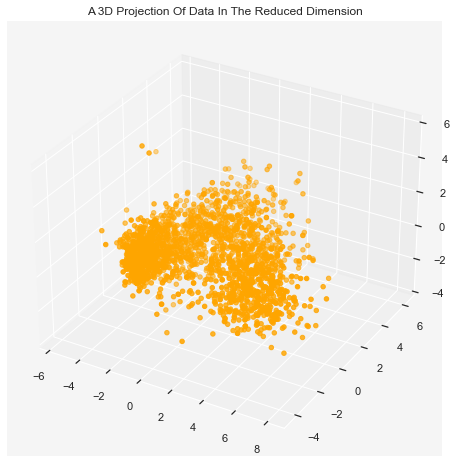

In [130]:
x =df_pca["col1"]
y =df_pca["col2"]
z =df_pca["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="orange", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Now that I've reduced the data features to three attributes, I'll perform clustering using a few different clustering methods:
- Agglomerative Clustering, a hierarchical clustering algorithm
- K-means Clustering, a centroid-based clustering algorithm
- DBSCAN, a density-based clustering algorithm

I'll look into the distributions of the clusters, as well as how they are distributed across income and spending. Since this clustering method will be used as a segmentation model, having a sensible separation across different variables showing shopping behavior is critical.

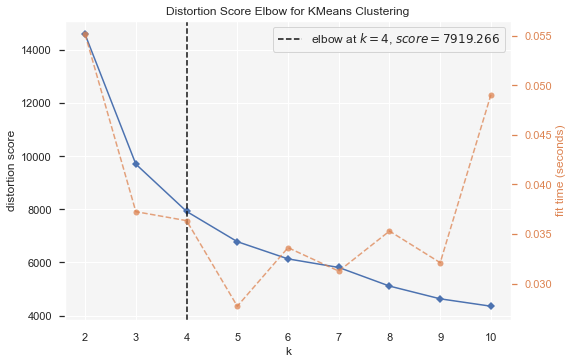

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()  

In [132]:
# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(df_pca)
agglomerative_score = silhouette_score(df_pca, agglomerative_labels)
print("Agglomerative Silhouette Score:", agglomerative_score)

# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_score = silhouette_score(df_pca, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_score)


# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)
dbscan_score = silhouette_score(df_pca, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_score)

Agglomerative Silhouette Score: 0.3188920039520088
K-Means Silhouette Score: 0.3649224921127321
DBSCAN Silhouette Score: -0.2826581449345044


### Agglomerative Clustering

In [133]:
df_pca["Clusters"] = agglomerative_labels
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= agglomerative_labels

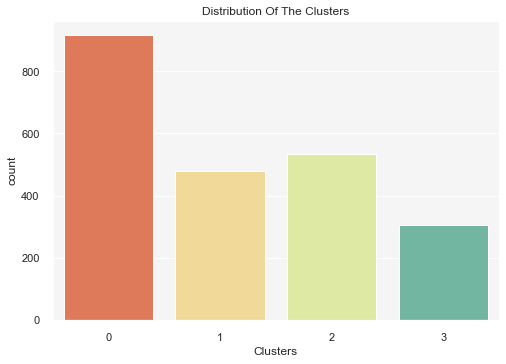

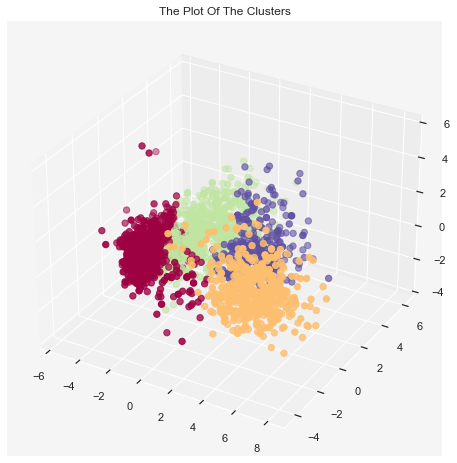

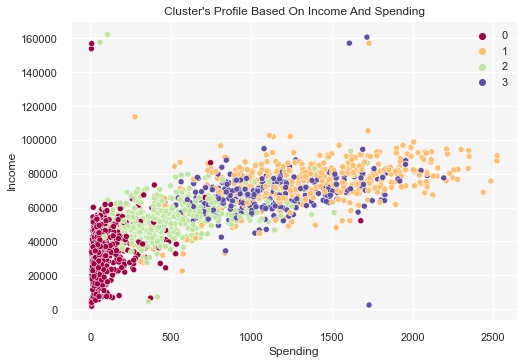

In [134]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette = "Spectral")
pl.set_title("Distribution Of The Clusters")
plt.show()

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o', cmap = 'Spectral' )
ax.set_title("The Plot Of The Clusters")
plt.show()

pl = sns.scatterplot(data = df,x=df["Spending"], y=df["Income"],hue=df["Clusters"], palette= 'Spectral')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### K-Means Clustering

In [135]:
df_pca["Clusters"] = kmeans_labels
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= kmeans_labels

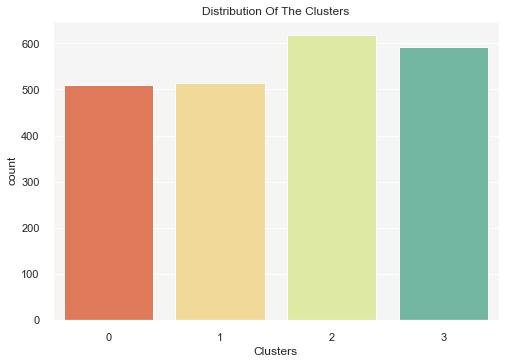

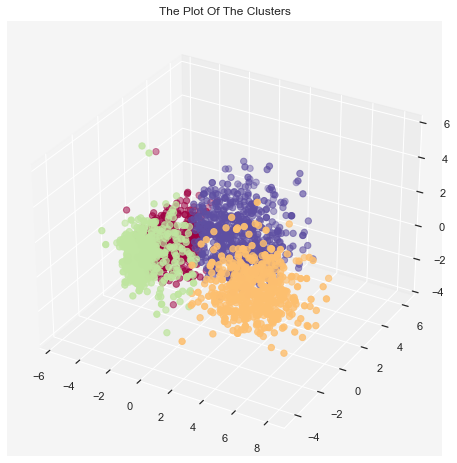

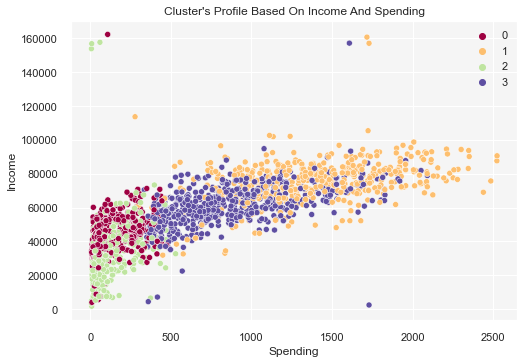

In [136]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette = "Spectral")
pl.set_title("Distribution Of The Clusters")
plt.show()

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o', cmap = 'Spectral' )
ax.set_title("The Plot Of The Clusters")
plt.show()

pl = sns.scatterplot(data = df,x=df["Spending"], y=df["Income"],hue=df["Clusters"], palette= 'Spectral')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### DBSCAN

In [137]:

df_pca["Clusters"] = dbscan_labels
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= dbscan_labels

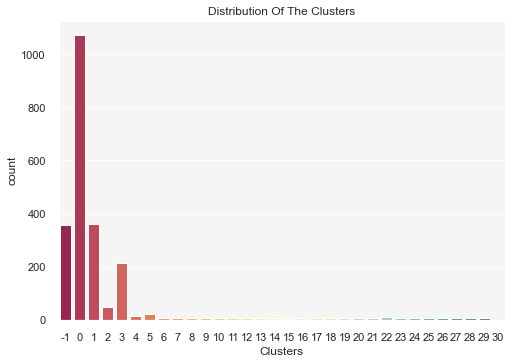

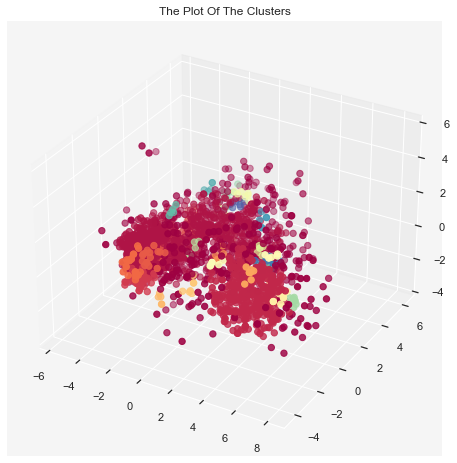

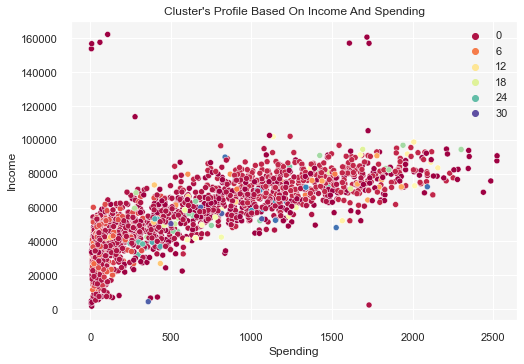

In [138]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette = "Spectral")
pl.set_title("Distribution Of The Clusters")
plt.show()

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o', cmap = 'Spectral' )
ax.set_title("The Plot Of The Clusters")
plt.show()

pl = sns.scatterplot(data = df,x=df["Spending"], y=df["Income"],hue=df["Clusters"], palette= 'Spectral')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

The DBSCAN results are not very good at all. We can disregard that method here. 

The agglomerative clustering and the K-means clustering both yielded good results. The silhouette score for the K-means is marginally higher. A score closer to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Since the K-means beat out the agglomerative clustering slightly, we'll use K-means clustering results to investigate the clusters with respect to customer behavior. 

In [145]:
df_pca["Clusters"] = kmeans_labels
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= kmeans_labels

Let's take another look at how the clusters are distributed against income vs spending

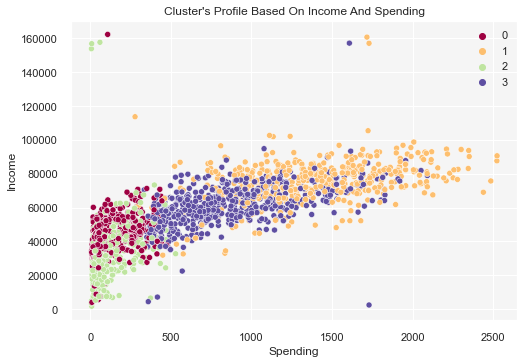

In [146]:
pl = sns.scatterplot(data = df,x=df["Spending"], y=df["Income"],hue=df["Clusters"], palette= 'Spectral')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Cluster 0: high spending, low income<br>
Cluster 1: high spending, high income<br>
Cluster 2: low spending, low income<br>
Cluster 3: average spending, average income

c:\Users\alyso\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\alyso\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\alyso\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\alyso\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


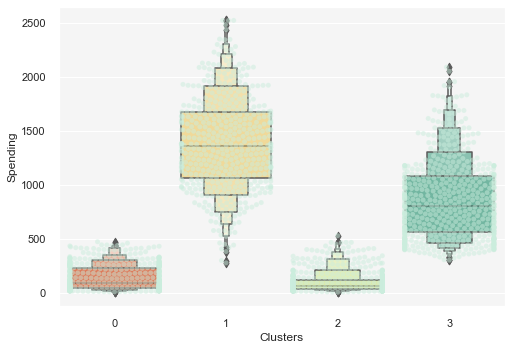

In [147]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spending"], palette='Spectral')
plt.show()

Clusters 1 & 3 have much more variance in spending.

Next, let's see how the campaigns did in the past.

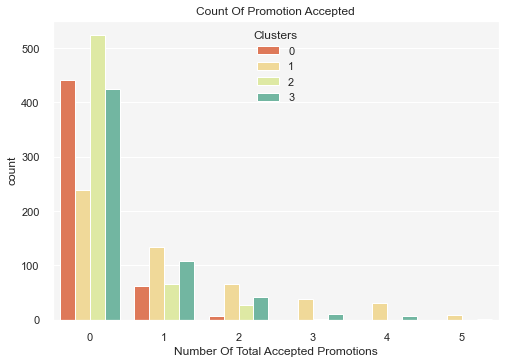

In [148]:

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["AcceptedCmp"],hue=df["Clusters"], palette= 'Spectral')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

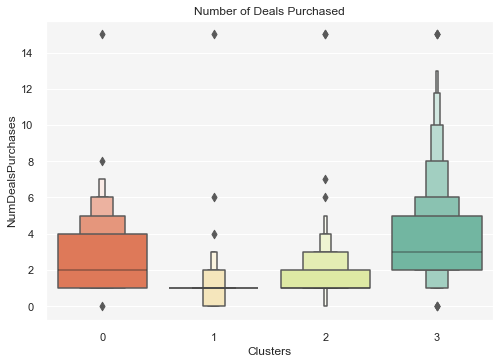

In [149]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= 'Spectral')
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 576x396 with 0 Axes>

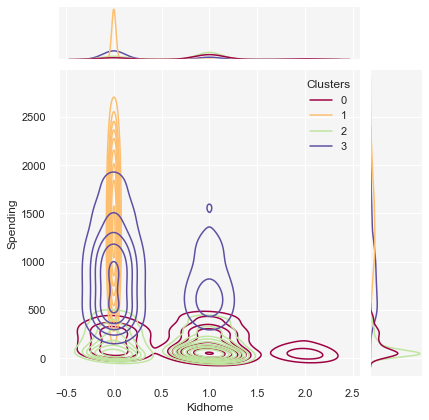

<Figure size 576x396 with 0 Axes>

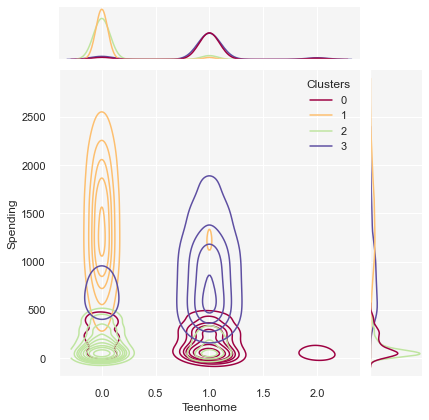

<Figure size 576x396 with 0 Axes>

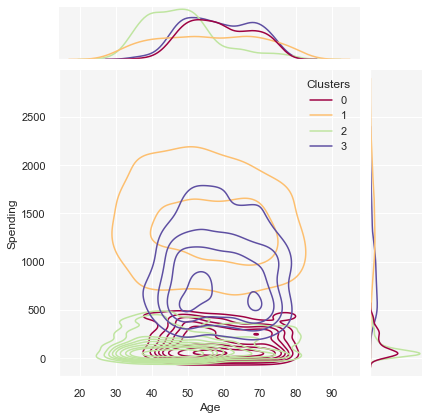

<Figure size 576x396 with 0 Axes>

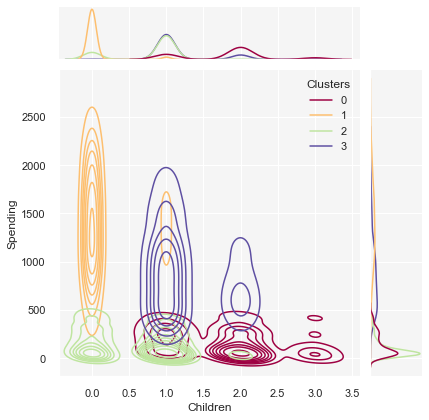

<Figure size 576x396 with 0 Axes>

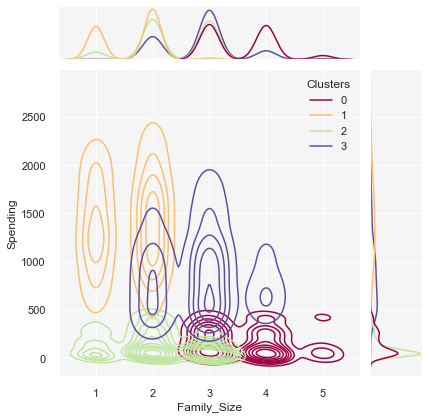

c:\Users\alyso\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

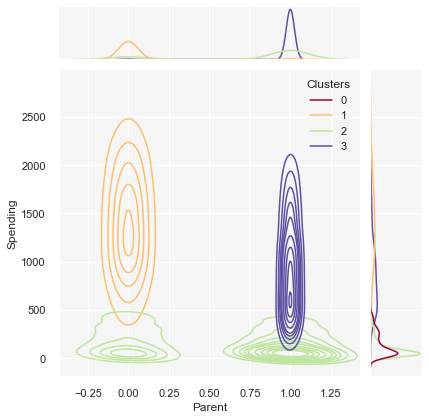

<Figure size 576x396 with 0 Axes>

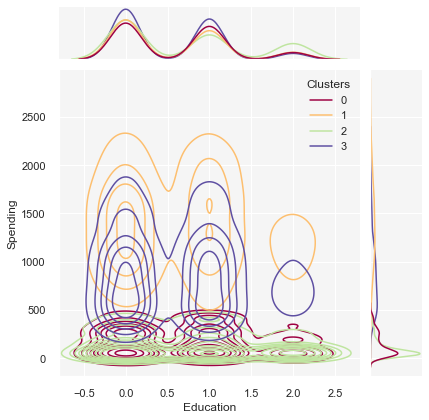

<Figure size 576x396 with 0 Axes>

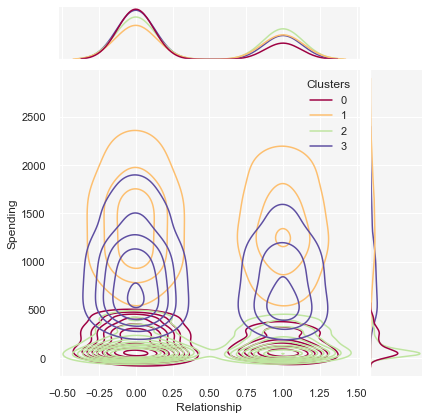

In [150]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Parent", "Education","Relationship"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spending"], hue =df["Clusters"], kind="kde", palette='Spectral')
    plt.show()

Some of the features are easily profiled, such as the breakdown of whether or not members of a particular cluster are a parent. Family size is unsurprisingly correlated with higher spending. More profiling could be performed in order to better understand the breakdown of each cluster of customers. 

As follow up, combining this data with a larger data set containing available products and creating a recommendation system could be useful for targeting certain customers and driving sales. 